In [ ]:
# import all required libraries

import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from scipy import ndimage
import cv2
import random
import seaborn as sns
import keras.utils

from keras import utils as np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.datasets import reuters

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Computer Vision - CNN



In [ ]:
# Load the data - training as well as testing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

#normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Prepare the data that can be used by the next step - creating and training the DL model
img_width, img_height, img_num_channels = 32, 32, 3
input_shape = (img_width, img_height, img_num_channels)

# The data from TensforFlow and Keras will only have integer class labels. Each of those 100 integer class labels correspond to the following names, in the correct order
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# These are the string labels for the 20 superclasses. You may not need to use this at all, just provided here for reference.
coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']



In [ ]:
def draw_img(x):
  plt.figure()
  plt.imshow(x)
  plt.show()

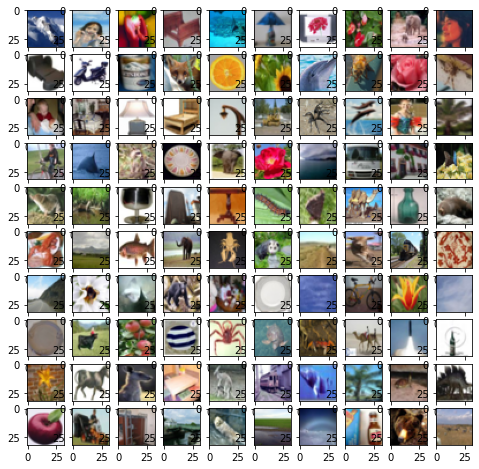

In [ ]:
# Visualize the data by plotting 100 random images, one each for the 100 classes
# Draw 10 images in one row, 10 rows total

w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = np.random.randint(0, 9999)
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_test[img])
plt.show()


## CNN Model Creation


*   Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')


In [ ]:
# Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.compile(loss = sparse_categorical_crossentropy,
              optimizer = Adam(),
              metrics=['accuracy'])

In [ ]:
# Print the DL model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

## Training



*   Train/fit the DL model using the training CIFAR-100 data
*   Plot the training/validation accuracy and loss



In [ ]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/"
checkpoint_path = '/content/drive/My Drive/Colab Notebooks/cifar/'
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)


In [ ]:
# Train/fit the DL model using the training CIFAR-100 data
history = model.fit(x_train, y_train,
            batch_size = 50,
            epochs = 100,
            verbose = 1,
            validation_split = 0.2,
            callbacks=[cp_callback])


Epoch 1/100
800/800 [==============================] - 61s 76ms/step - loss: 4.0814 - accuracy: 0.0690 - val_loss: 3.7161 - val_accuracy: 0.1180

Epoch 00001: saving model to /content/drive/My Drive/Colab Notebooks/cifar/
Epoch 2/100
800/800 [==============================] - 62s 77ms/step - loss: 3.4408 - accuracy: 0.1702 - val_loss: 3.3177 - val_accuracy: 0.1973

Epoch 00002: saving model to /content/drive/My Drive/Colab Notebooks/cifar/
Epoch 3/100
800/800 [==============================] - 62s 77ms/step - loss: 3.1017 - accuracy: 0.2324 - val_loss: 3.0648 - val_accuracy: 0.2413

Epoch 00003: saving model to /content/drive/My Drive/Colab Notebooks/cifar/
Epoch 4/100
800/800 [==============================] - 62s 77ms/step - loss: 2.8589 - accuracy: 0.2808 - val_loss: 2.9342 - val_accuracy: 0.2708

Epoch 00004: saving model to /content/drive/My Drive/Colab Notebooks/cifar/
Epoch 5/100
800/800 [==============================] - 62s 78ms/step - loss: 2.6693 - accuracy: 0.3175 - val_los

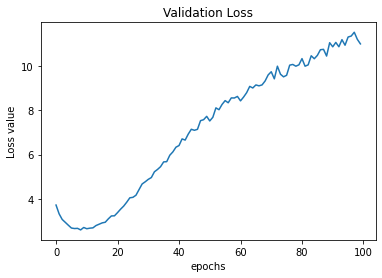

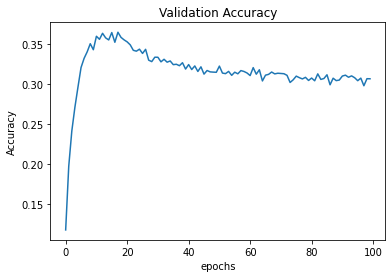

In [ ]:
# Plot the training/validation accuracy and loss

# Loss
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.ylabel('Loss value')
plt.xlabel('epochs')
plt.show()

# Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.show()


## Testing/Evaluation



In [ ]:
# Re-initialize the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.compile(loss = sparse_categorical_crossentropy,
              optimizer = Adam(),
              metrics=['accuracy'])



In [ ]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/cifar/"

model.load_weights(checkpoint_path)

In [ ]:
# Evaluate the trained DL model on the CIFAR-100 test dataset
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))



313/313 - 4s - loss: 10.9452 - accuracy: 0.3101
Accuracy: 31.01%


# Natural Language Processing - RNN




## Load/Prepare Data



*   Load the Reuters dataset - Keras version
 *   Select the vocabulary size while loading the data
 *   The data will be loaded as integer representations for each word
*   Prepare the data to be used for the next steps
 *   Each data entry (newswire) 
 *   Make each newswire consistent 


In [ ]:
# Load the Reuters dataset - use the Keras version
#   Select the vocabulary size while loading the data
#   The data will be loaded as integer representations for each word

(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words = 1000, test_split=0.2)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
# Prepare the data to be used for the next steps
#   Each data entry (newswire) can be of different lengths
#   Make each newswire consistent - same number of words
#   'Pad' words (say 0) to get to the standard length or remove words

X_train = pad_sequences(X_train, maxlen = 100)
X_test = pad_sequences(X_test, maxlen = 100) 

Y_train = to_categorical(Y_train) 
Y_test = to_categorical(Y_test)

from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model


## RNN Model Creation



*   Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU


In [ ]:
# Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
checkpoints_path = "/content/drive/My Drive/Colab Notebooks/reuters/"

rn_model = Sequential()
rn_model.add(Embedding(1000, 120))
rn_model.add(LSTM(120))
rn_model.add(Dense(46, activation='softmax'))



#compile
rn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
# Print the DL model summary
rn_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 120)         120000    
_________________________________________________________________
lstm (LSTM)                  (None, 120)               115680    
_________________________________________________________________
dense_6 (Dense)              (None, 46)                5566      
Total params: 241,246
Trainable params: 241,246
Non-trainable params: 0
_________________________________________________________________


## Training




In [ ]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/"
checkpoints_path = "/content/drive/My Drive/Colab Notebooks/reuters/"
rncp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoints_path, save_weights_only=True, verbose=1)


In [ ]:
# Train/fit the DL model using the training Reuters data
history = rn_model.fit(X_train, Y_train, batch_size=128, epochs=70, callbacks=[rncp_callback], validation_data=(X_test, Y_test))

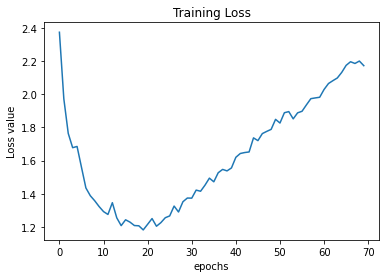

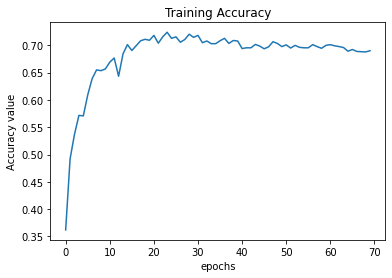

In [ ]:
# Plot the training/validation accuracy and loss
# Loss
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.ylabel('Loss value')
plt.xlabel('epochs')
plt.show()

# Accuracy
plt.plot(history.history['val_acc'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy value')
plt.xlabel('epochs')
plt.show()


## Testing/Evaluation



In [ ]:
# Re-initialize the model

rn_model = Sequential()
rn_model.add(Embedding(1000, 120))
rn_model.add(LSTM(120))
rn_model.add(Dense(46, activation='softmax'))

#compile
rn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/reuters/"
rn_model.load_weights(checkpoints_path)

In [ ]:
# Evaluate the trained DL model on the Reuters test dataset
rn_loss,rn_acc = rn_model.evaluate(X_test,  Y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*rn_acc))

71/71 - 2s - loss: 2.1723 - acc: 0.6901
Accuracy: 69.01%
